# Core Ideas of Supervised Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
print(pd.__version__)

0.22.0


In [23]:
import numpy as np
print(np.__version__)

1.14.3


## First Load our Data and get an intuition for it

In [5]:
!curl -O https://raw.githubusercontent.com/DJCordhose/ai/master/notebooks/video/data/insurance-customers-1500.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 26935  100 26935    0     0  86330      0 --:--:-- --:--:-- --:--:-- 86330


In [6]:
df = pd.read_csv('./insurance-customers-1500.csv', sep=';')

In [7]:
df.head()

,max speed,age,thousand km per year,group
0,148.0,44.0,25.0,1
1,168.0,54.0,24.0,1
2,161.0,26.0,34.0,0
3,137.0,25.0,10.0,2
4,164.0,38.0,22.0,1


In [8]:
df.describe()

,max speed,age,thousand km per year,group
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,171.386000,44.969333,30.511333,0.998667
std,19.269126,16.935040,15.112317,0.816768
min,118.000000,18.000000,5.000000,0.000000
25%,158.000000,32.000000,18.000000,0.000000
50%,170.000000,42.000000,29.000000,1.000000
75%,187.000000,55.000000,42.000000,2.000000
max,216.000000,90.000000,84.000000,2.000000


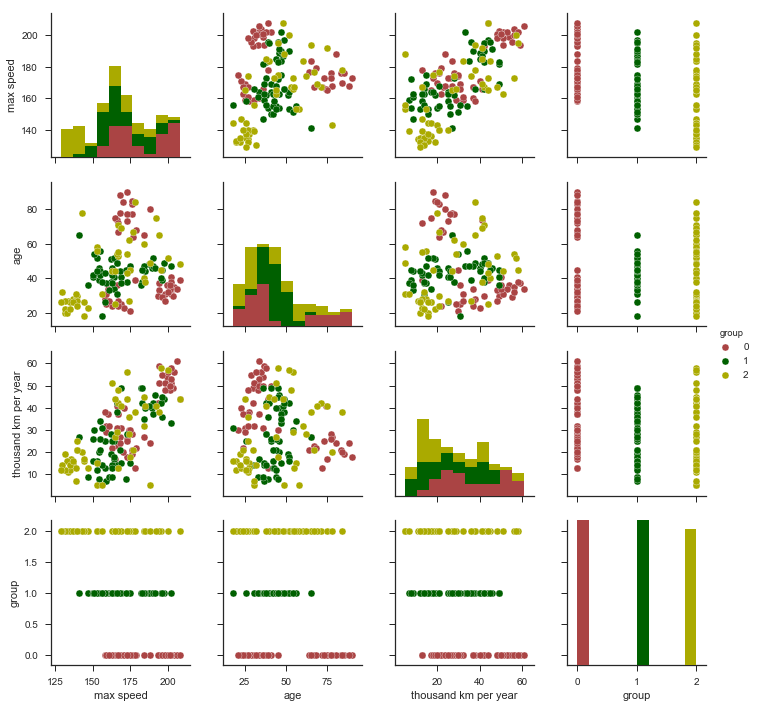

In [10]:
import seaborn as sns
sns.set(style="ticks")

sample_df = df.sample(n=150, random_state=42)

colors_light = {0: '#FFAAAA', 1: '#AAFFAA', 2: '#FFFFDD'}
colors_bold = {0: '#AA4444', 1: '#006000', 2: '#AAAA00'}

sns.pairplot(sample_df, hue="group", palette=colors_bold)

## First important concept: You train a machine with your data to make it learn the relationship between some input data and a certain lable - this is called supervised learning

In [11]:
y=df['group']

In [12]:
df.drop('group', axis='columns', inplace=True)

In [13]:
X = df.as_matrix()

In [14]:
corrmat = df.corr()

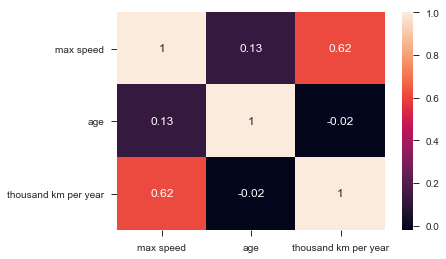

In [15]:
sns.heatmap(corrmat, annot=True)

In [24]:
# ignore this, it is just technical code to plot decision boundaries
# Adapted from:
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", 
                   mesh=True, fname=None, print=False):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    if print:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    else:
        plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [25]:
X_kmh_age = X[:, :2] 

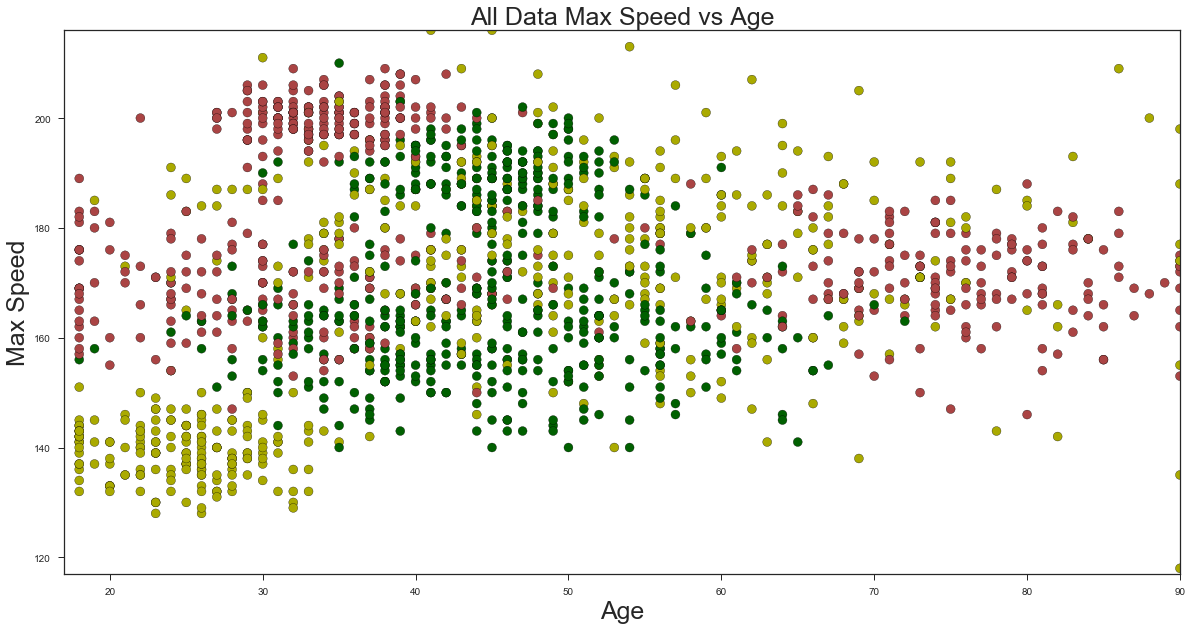

In [27]:
plotPrediction(None, X_kmh_age[:, 1], X_kmh_age[:, 0], 
               'Age', 'Max Speed', y, mesh=False,
                title="All Data Max Speed vs Age")

## Second important concept: To have an idea how well the training worked, we save same data to try our model on previously unseen data. How well it performs on this test data as opposed to the training data tells us quite a bit.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [24]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((900, 3), (900,), (600, 3), (600,))

In [0]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

In [0]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(1)

In [0]:
%time clf.fit(X_train_2_dim, y_train)

In [0]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [0]:
clf.score(X_train_2_dim, y_train)

In [0]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [0]:
clf.score(X_test_2_dim, y_test)

## Third Step: KNN with less overfitting, paying with more underfitting

In [0]:
clf = neighbors.KNeighborsClassifier(5)
%time clf.fit(X_train_2_dim, y_train)

In [0]:
plotPrediction(clf, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train,
                title="Train Data Max Speed vs Age with Classification")

In [0]:
clf.score(X_train_2_dim, y_train)

In [0]:
plotPrediction(clf, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test,
                title="Test Data Max Speed vs Age with Prediction")

In [0]:
clf.score(X_test_2_dim, y_test)

## Fourth Step: Sample Usage and Confusion Matrix

In [0]:
clf = neighbors.KNeighborsClassifier(13)
%time clf.fit(X_train, y_train)

In [0]:
sample_X = X[:1]
sample_X

In [0]:
y[:1]

In [0]:
clf.predict(sample_X)

In [0]:
clf.predict_proba(sample_X)

In [0]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X)
y_true = np.array(y)
cm = confusion_matrix(y_true, y_pred)
cm

In [0]:
# 0: red
# 1: green
# 2: yellow

import seaborn as sns
sns.heatmap(cm, annot=True, cmap="YlGnBu")
figure = plt.gcf()
ax = figure.add_subplot(111)
ax.set_xlabel('Prediction', fontsize=20)
ax.set_ylabel('Ground Truth', fontsize=20)